In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow import keras

2025-04-23 14:19:41.630070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745417981.840906      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745417981.903381      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the Dataset
df = pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
features = df.columns
print(features)

Index(['url', 'type'], dtype='object')


In [4]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [6]:
# pip install wordcloud

FileNotFoundError: [Errno 2] No such file or directory: './Images/Distribution of Types of Attacks.png'

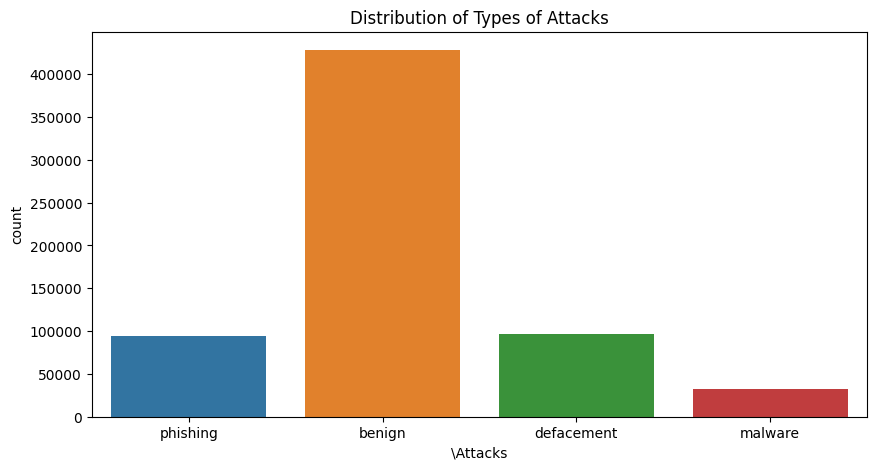

In [7]:
plt.figure(figsize= (10 , 5))
plt.title('Distribution of Types of Attacks')
sns.countplot(x = 'type', data = df)
# ax.bar_label(ax.containers[0])
plt.xlabel('\Attacks')
plt.savefig('./Images/Distribution of Types of Attacks.png', bbox_inches='tight')

### WordCloud of Different Types of Attacks

In [8]:
df_phish = df[df['type'] == 'phishing']
df_benign = df[df['type'] == 'benign']
df_deface = df[df['type'] == 'defacement']
df_malware = df[df['type'] == 'malware']

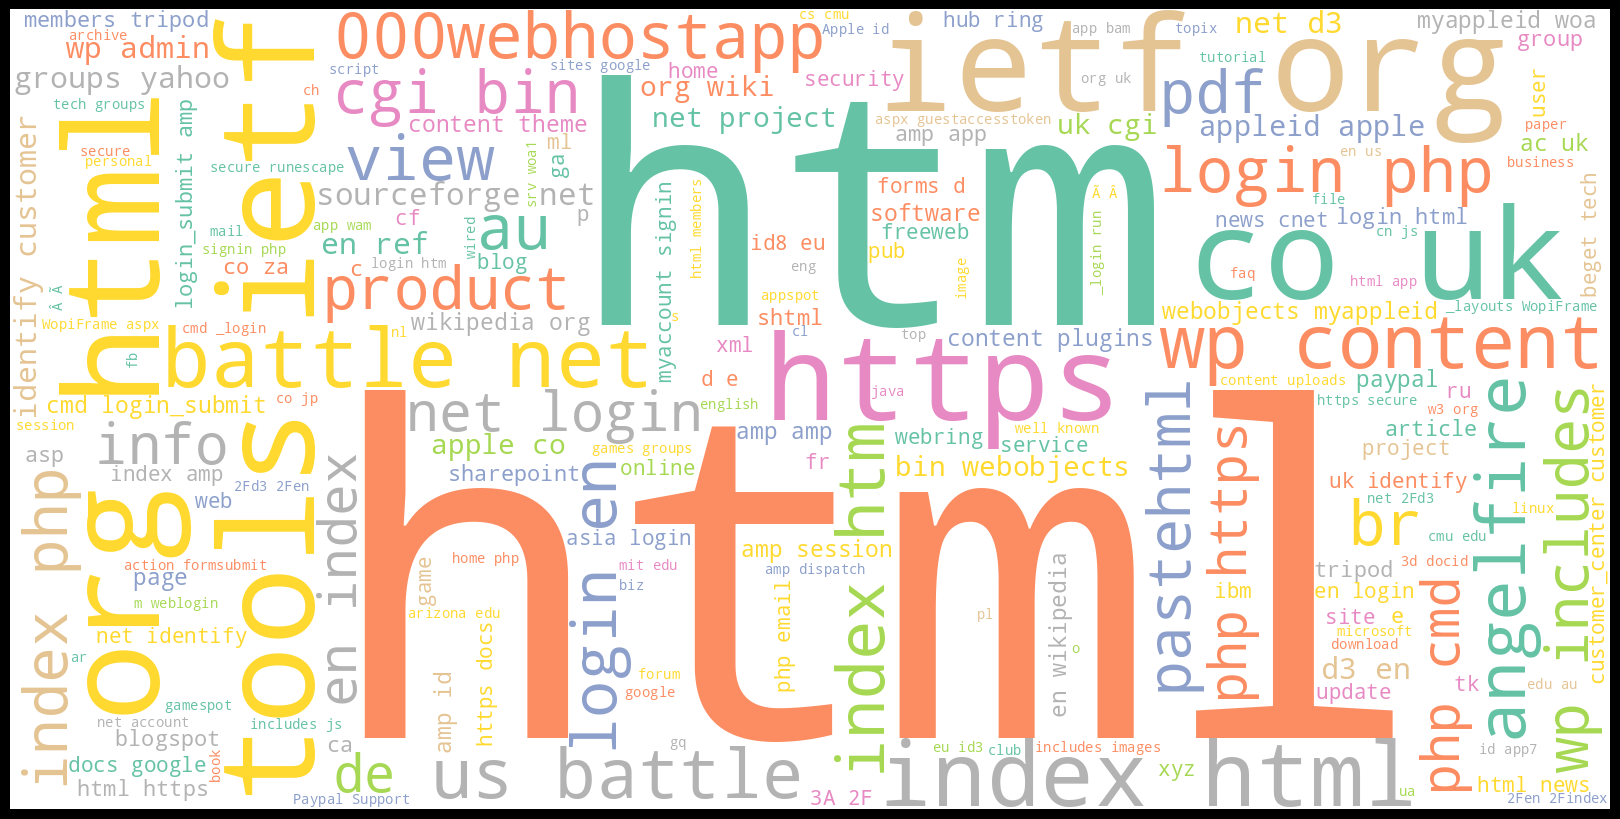

In [9]:
phish_url = " ".join(i for i in df_phish.url)
# print(phish_url[0: 1000])
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(phish_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/phish_wordcloud.png', bbox_inches='tight')

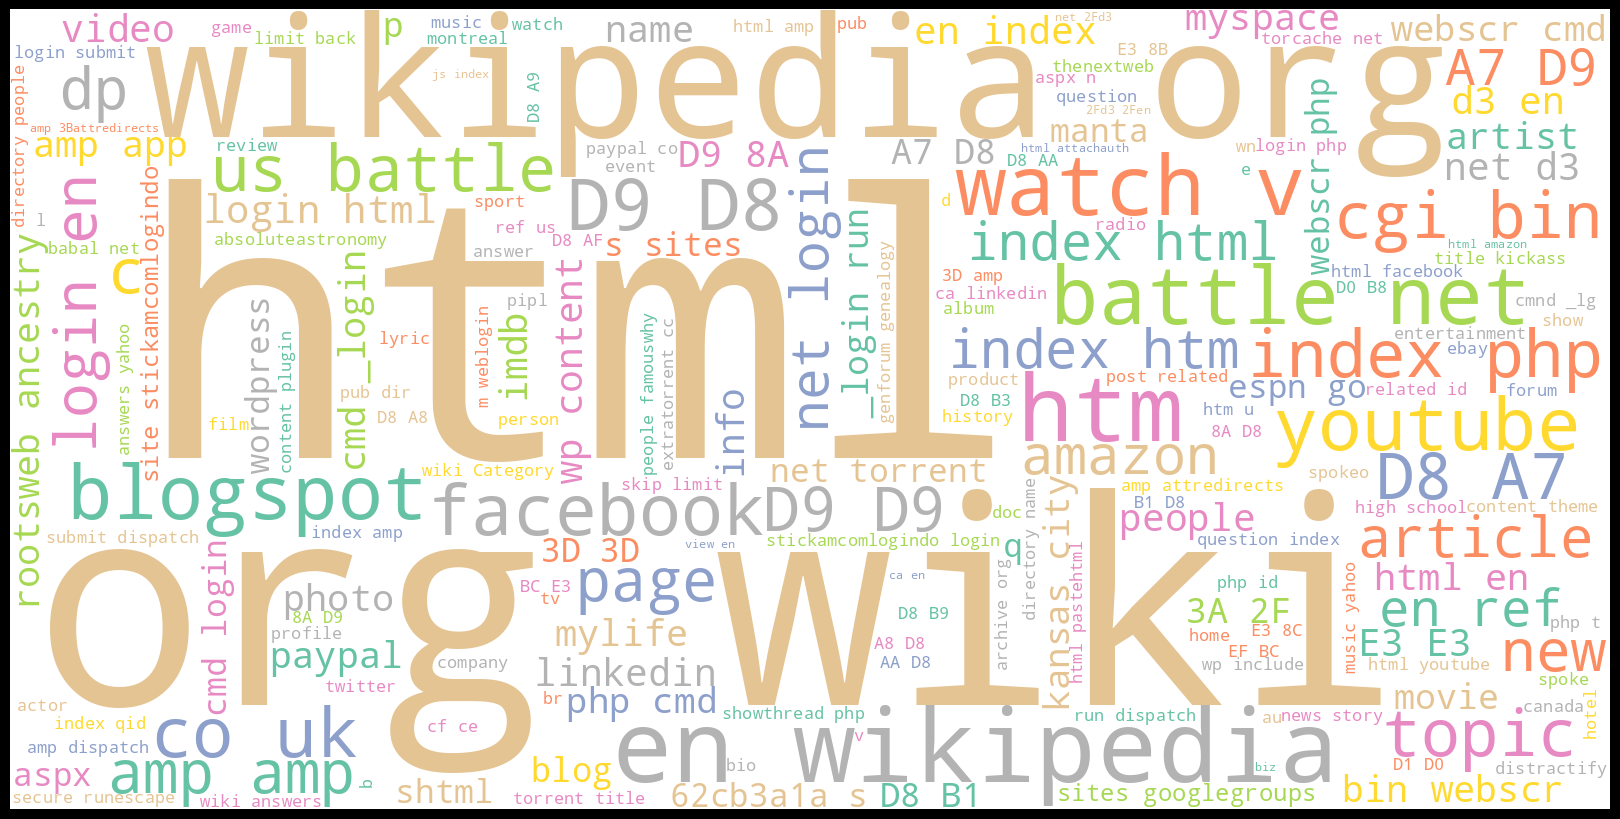

In [10]:
benign_url = " ".join(i for i in df_benign.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(benign_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/benign_wordcloud.png')

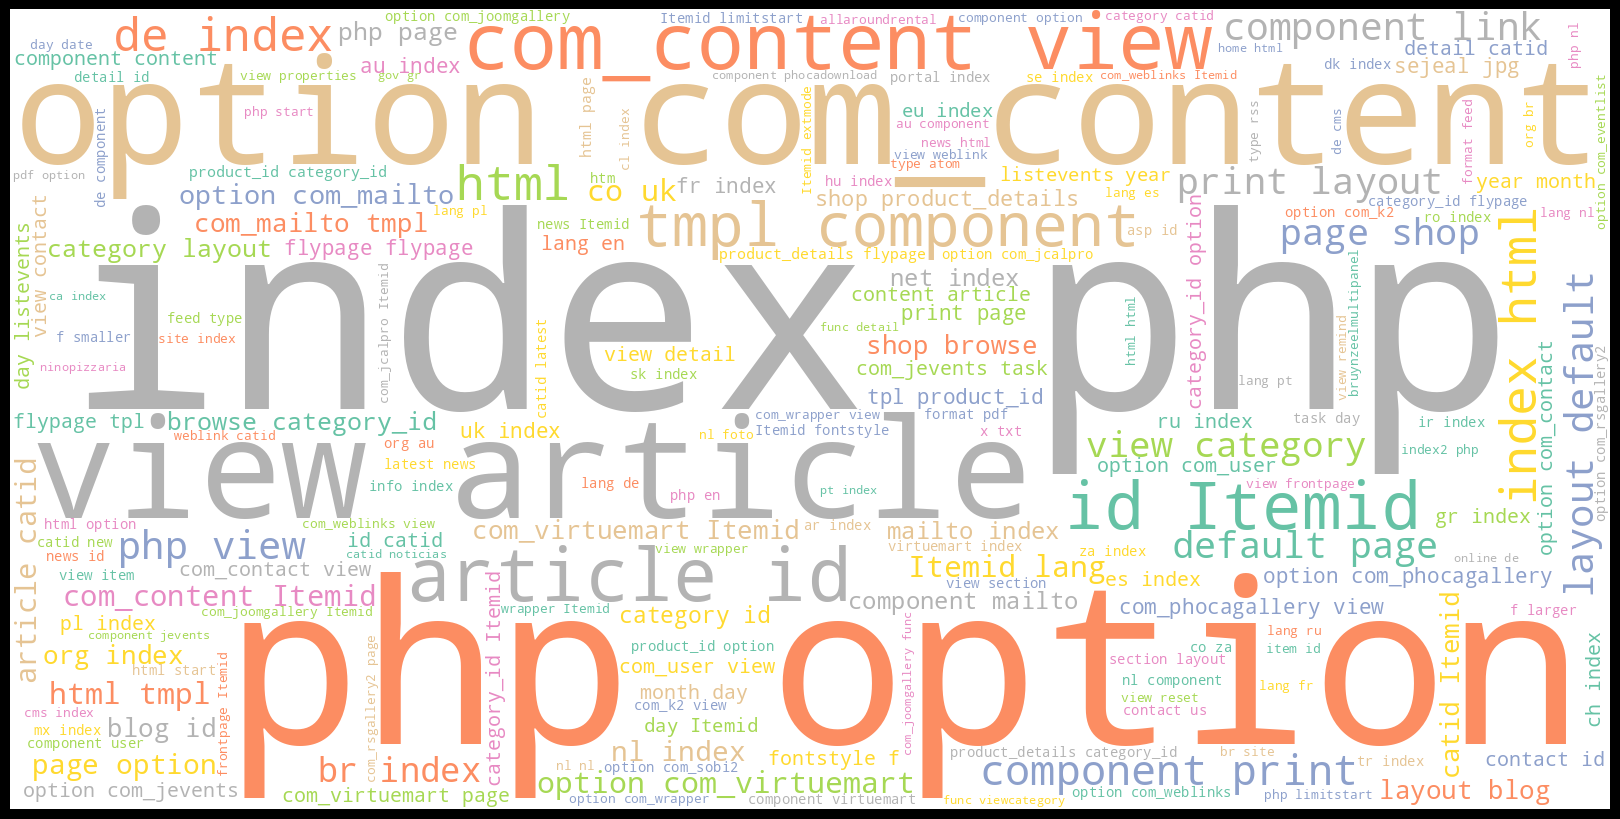

In [11]:
deface_url = " ".join(i for i in df_deface.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(deface_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/deface_wordcloud.png')

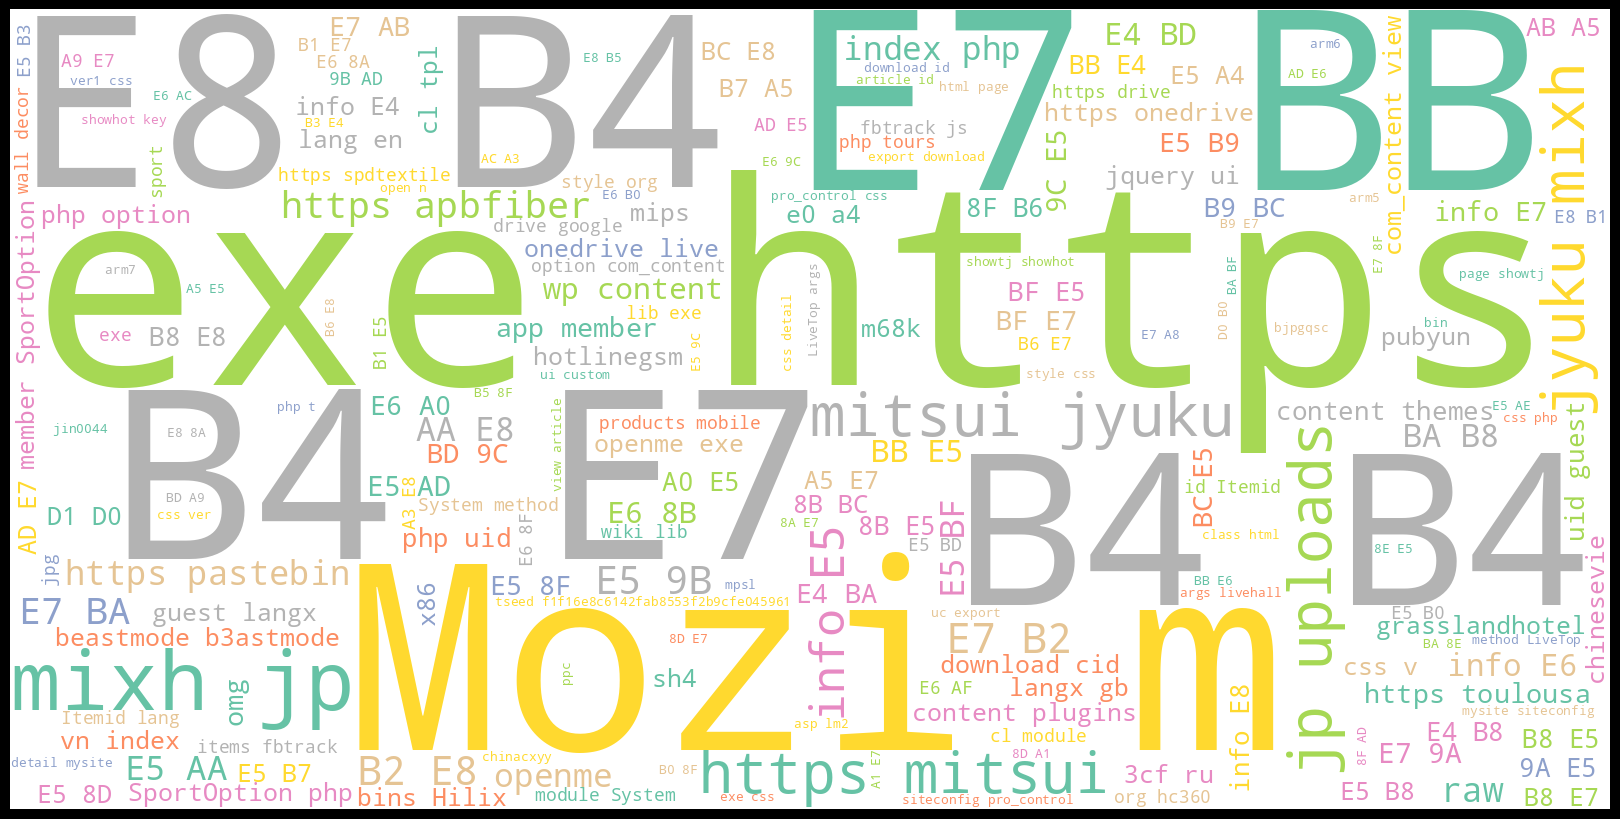

In [12]:
malware_url = " ".join(i for i in df_malware.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(malware_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/malware_wordcloud.png')

# Feature Engineering

#### In this step, we will extract the following lexical features from raw URLs, as these features will be used as the input features for training the machine learning model. The following features are created as follows:

### having_ip_address: 
Generally cyber attackers use an IP address in place of the domain name to hide the identity of the website. this feature will check whether the URL has IP address or not.

In [13]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    
    
    if match:

        return 1
    else:

        return 0

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [14]:
df['use_of_ip'].value_counts()

use_of_ip
0    643898
1      7293
Name: count, dtype: int64

In [15]:
df[df['use_of_ip'] == 1]

,url,type,use_of_ip
10408,http://219.232.244.89/intl/update/error_login.htm,phishing,1
12441,boards.ancestry.com/topics.ethnic.natam.nation...,benign,1
12853,http://www.controlyourbreath.com/new/css_/img/...,phishing,1
13161,http://www.reqntpvw.com/Public/softs/everythin...,malware,1
14915,http://66.208.115.70/images/index.asp,phishing,1
...,...,...,...
598624,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
598638,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
601657,www.mairie-saint-avold.fr/admin/125.14.226.143...,benign,1
601697,www.mairie-saint-avold.fr/admin/190.244.107.16...,benign,1


Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

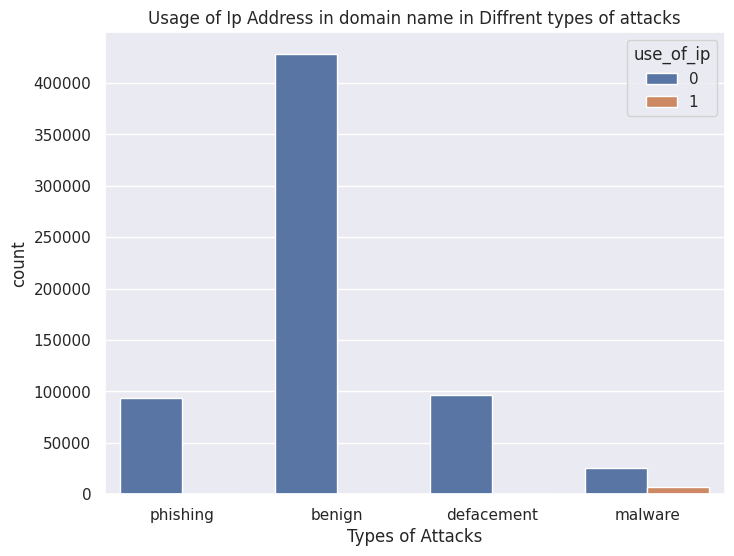

In [16]:

plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="use_of_ip")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [17]:
arr = np.where(df[df['type'] == 'benign']['use_of_ip'] == 1)
arr[0].shape

(89,)

In [18]:
arr = np.where(df[df['type'] == 'malware']['use_of_ip'] == 1)
arr[0].shape

(6870,)

In [19]:
arr = np.where(df[df['type'] == 'phishing']['use_of_ip'] == 1)
arr[0].shape

(334,)

In [20]:
arr = np.where(df[df['type'] == 'defacement']['use_of_ip'] == 1)
arr[0].shape

(0,)

### Abnormal URL

This feature can be extracted from the WHOIS database. For a legitimate website, identity is typically part of its URL.

In [21]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:      
        return 1
    else:
       
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [22]:
df['abnormal_url'].value_counts()

abnormal_url
0    463185
1    188006
Name: count, dtype: int64

Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

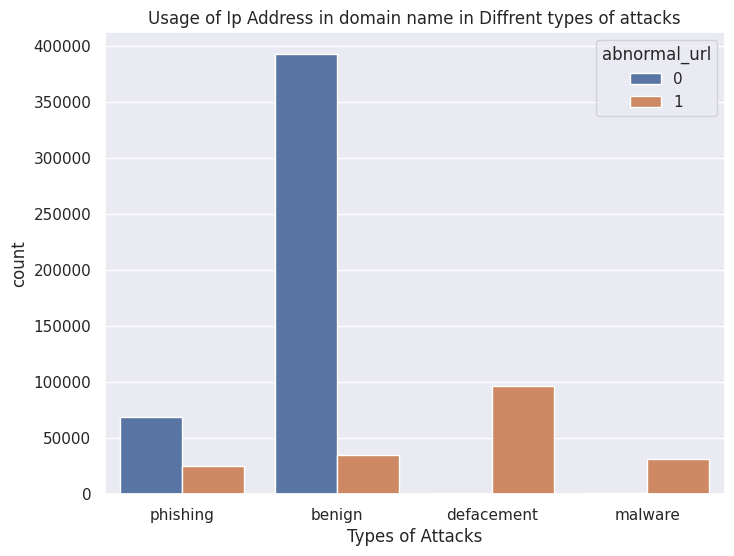

In [23]:
plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="abnormal_url")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [24]:
arr = df[df['type'] == 'benign']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
0    392709
1     35394
Name: count, dtype: int64

In [25]:
arr = df[df['type'] == 'phishing']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
0    69266
1    24845
Name: count, dtype: int64

In [26]:
arr = df[df['type'] == 'defacement']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
1    96457
Name: count, dtype: int64

In [27]:
arr = df[df['type'] == 'malware']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
1    31310
0     1210
Name: count, dtype: int64

In [28]:
!pip install googlesearch-python

In [29]:
from googlesearch import search

### google_index:
In this feature, we check whether the URL is indexed in google search console or not.

In [30]:
def google_index(url):
    
    site = search(url, 5)
    return 1 if site else 0

df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [31]:
print(df['url'][0])
for j in search(df['url'][0], num_results=10):
    print(j)

br-icloud.com.br
https://www.icloud.com/
http://br-icloud.com.br/
https://www.apple.com/br/icloud/
https://www.apple.com/br/icloud/find-my/
https://www.icloud.com.br/
https://www.icloud.com.br/iniciar-sessao
https://www.reddit.com/r/ios/comments/10bshiv/iphone_repeatedly_asking_to_verify_my_icloud/?tl=pt-br
https://www.joesandbox.com/analysis/1625870/0/html
https://www.reddit.com/r/iCloud/comments/111dc3j/your_apple_id_cannot_end_in_icloudcom_choose_a/?tl=pt-br
https://any.run/report/703f3acecfa0b1c73a48f83df64d52327dd5d83108c2c6a9c2b861e5eac941bf/8f86a61e-53eb-4e72-abc2-51633592d326


In [32]:
df['google_index'].value_counts()

google_index
1    651191
Name: count, dtype: int64

### Count dot (.) : 
The phishing or malware websites generally use more than two sub-domains in the URL. Each domain is separated by dot (.). If any URL contains more than three dots(.), then it increases the probability of a malicious site.

In [33]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [34]:
df['count.'].value_counts()

count.
2     236038
1     219105
3     129667
4      40227
5       9436
6       5729
7       3570
8       1566
9       1150
10      1114
11       973
12       757
13       505
14       379
15       259
16       144
20       129
17       118
19        88
18        70
0         61
22        24
24        22
21        18
23        10
25         9
36         5
27         4
26         4
35         3
42         3
31         1
37         1
34         1
28         1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of Dots Available in URLS ')

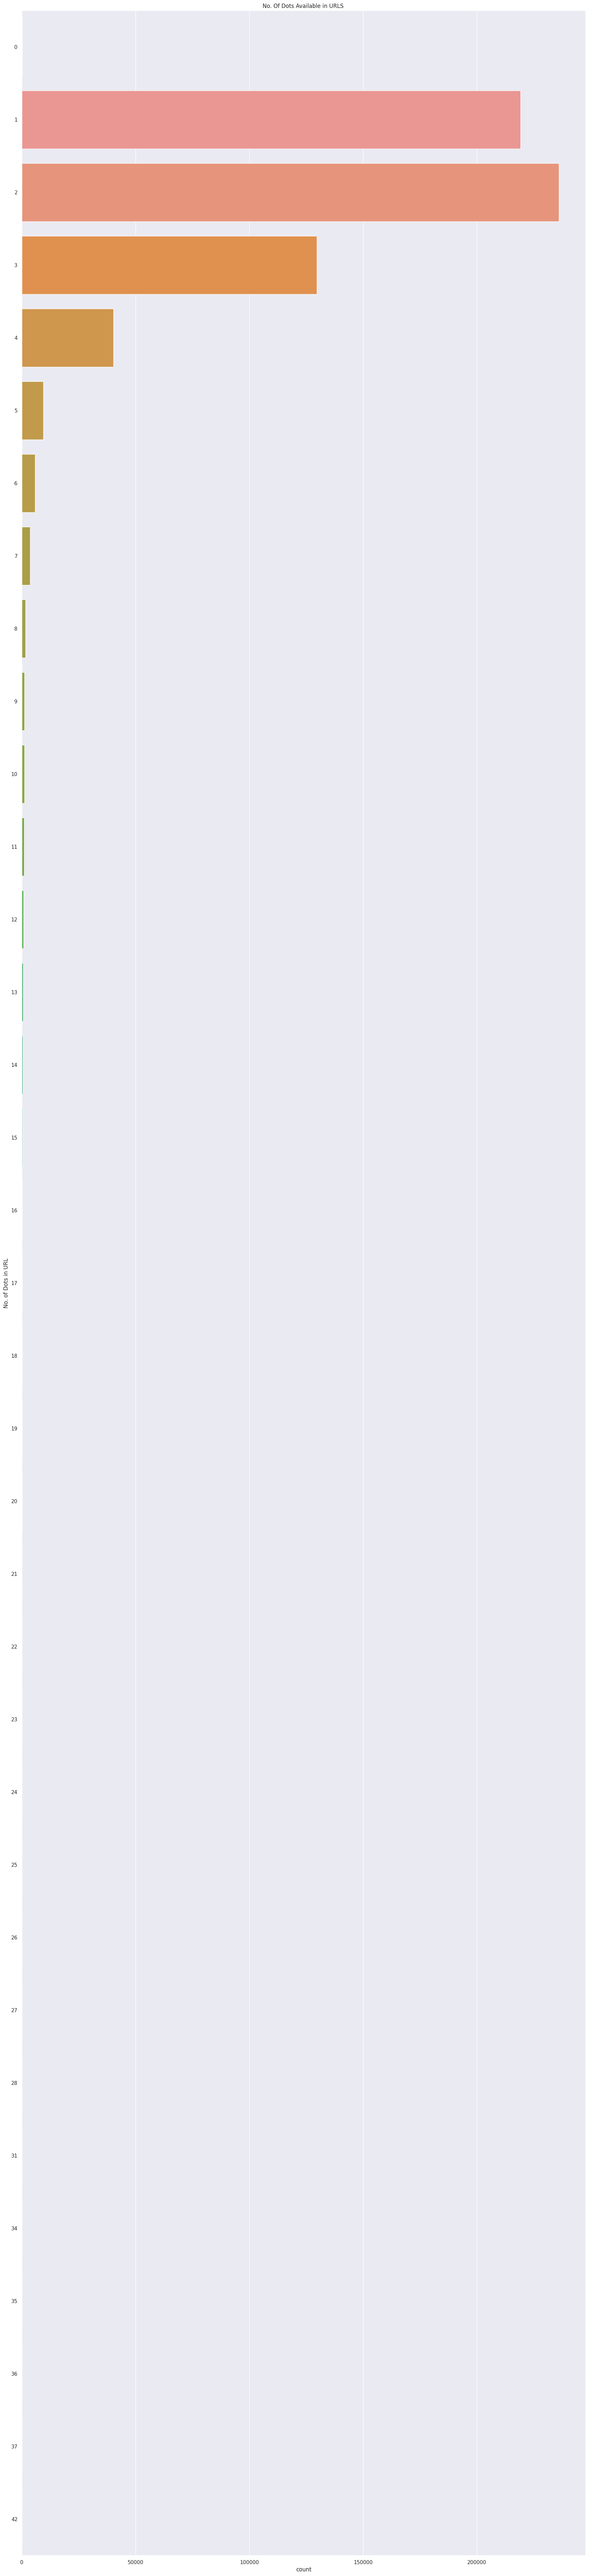

In [35]:
plt.figure(figsize = (22 , 100))
sns.set(style="darkgrid")
ax = sns.countplot(y="count.", data=df)
plt.ylabel('No. of Dots in URL')
plt.title("No. Of Dots Available in URLS ")

### Count-www: 
Generally most of the safe websites have one www in its URL. This feature helps in detecting malicious websites if the URL has no or more than one www in its URL.

In [36]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [37]:
df['count-www'].value_counts()

count-www
0    525525
1    124178
2      1422
3        58
4         7
5         1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of WWW Available in URLS ')

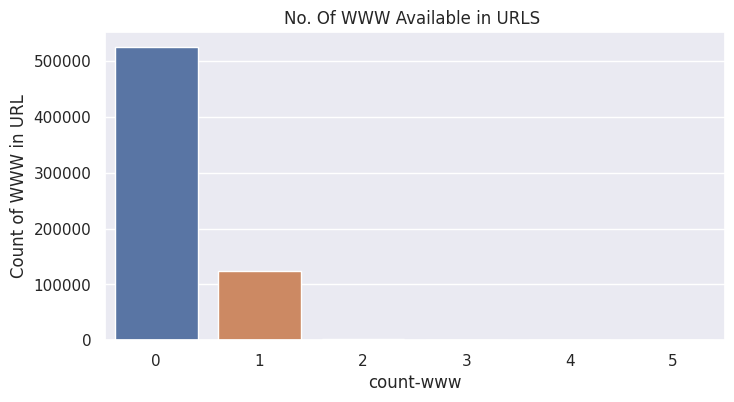

In [38]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count-www", data=df)
plt.ylabel('Count of WWW in URL')
plt.title("No. Of WWW Available in URLS ")

### count@: 
The presence of the “@” symbol in the URL ignores everything previous to it. 

In [39]:
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [40]:
df['count@'].value_counts()

count@
0     649845
1       1290
2         40
3          9
4          3
10         3
6          1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of @ Available in URLS ')

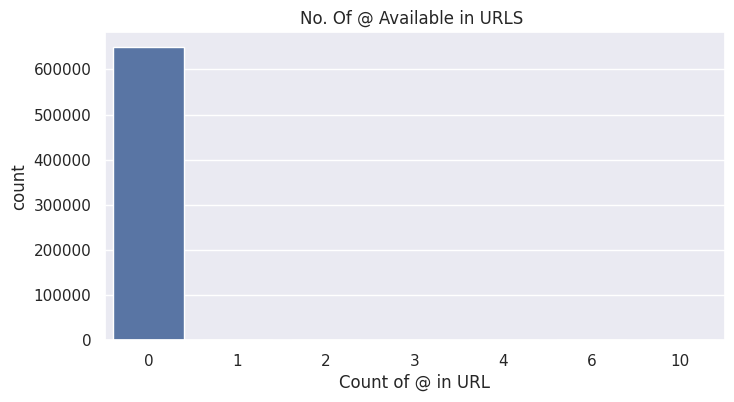

In [41]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count@", data=df)
plt.xlabel('Count of @ in URL')
plt.title("No. Of @ Available in URLS ")

### Count_dir: 
The presence of multiple directories in the URL generally indicates suspicious websites.

In [42]:
def no_of_dir(url):
    urldir = urlparse(url).path
#     print(urldir)
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [43]:
print(df['url'][5])
no_of_dir(df['url'][5])

http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html


3

In [44]:
df['count_dir'].value_counts()

count_dir
1     208263
2     185322
3     120164
4      53510
5      35379
0      23046
6      14204
7       5671
8       2326
10      1362
9        966
11       343
13       176
12       165
14       161
16        50
15        32
22        12
18        10
17         9
21         5
19         3
24         2
23         2
27         2
39         1
28         1
25         1
20         1
32         1
34         1
Name: count, dtype: int64

### Count_embed_domain: 
The number of the embedded domains can be helpful in detecting malicious URLs. It can be done by checking the occurrence of “//” in the URL.


In [45]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [46]:
def no_of_embed(url):
    urldir = urlparse(url).path
    
    print(urldir)
    return urldir.count('//')

print(df['url'][7])
no_of_embed(df['url'][7])


yourbittorrent.com/?q=anthony-hamilton-soulife
yourbittorrent.com/


0

In [47]:
df['count_embed_domain'].value_counts()

count_embed_domain
0    650205
1       974
2        12
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of embedded domain Available in URLS ')

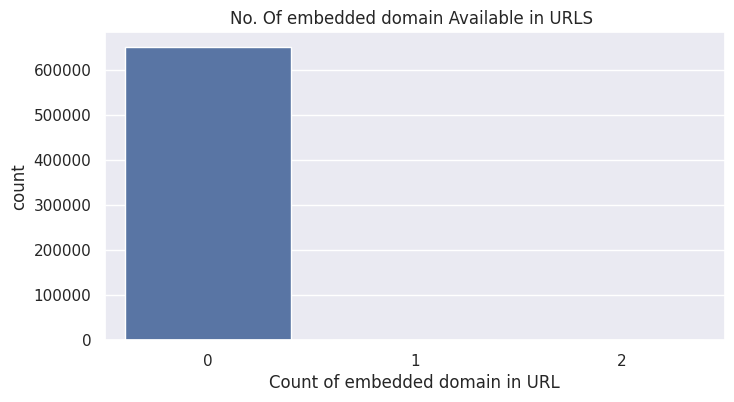

In [48]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_embed_domain", data=df)
plt.xlabel('Count of embedded domain in URL')
plt.title("No. Of embedded domain Available in URLS ")

### Suspicious words in URL: 
Malicious URLs generally contain suspicious words in the URL such as PayPal, login, sign in, bank, account, update, bonus, service, ebayisapi, token, etc. We have found the presence of such frequently occurring suspicious words in the URL as a binary variable i.e., whether such words present in the URL or not.

In [49]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [50]:
df['sus_url'].value_counts()

sus_url
0    607818
1     43373
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of Suspicious Words  Available in URLS ')

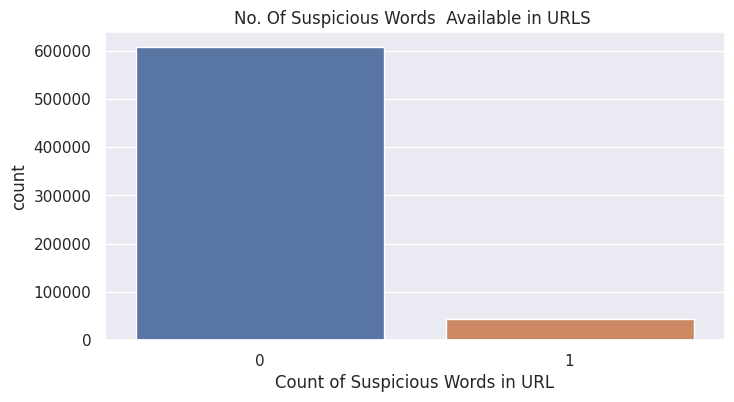

In [51]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sus_url", data=df)
plt.xlabel('Count of Suspicious Words in URL')
plt.title("No. Of Suspicious Words  Available in URLS ")

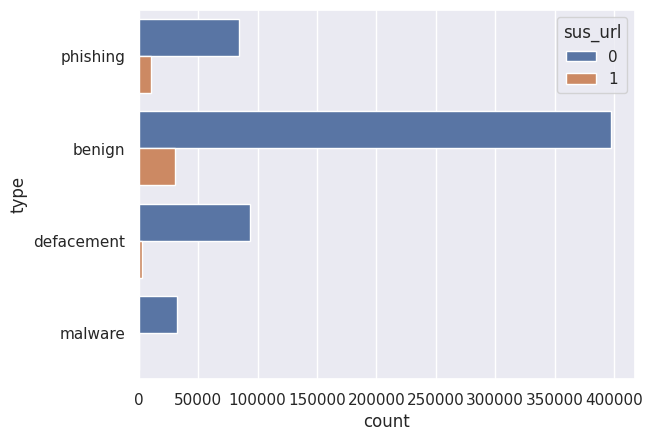

In [52]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

### Short_url: 
This feature is created to identify whether the URL uses URL shortening services like bit. \ly, goo.gl, go2l.ink, etc.

In [53]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [54]:
df['short_url'].value_counts()

short_url
0    611436
1     39755
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify whether the URL uses URL shortening services')

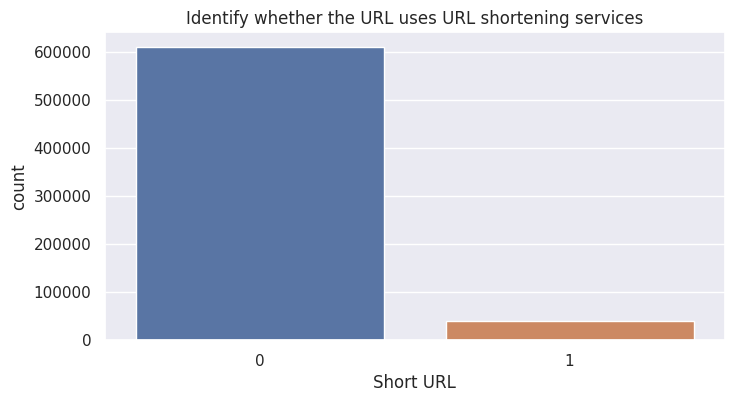

In [55]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="short_url", data=df)
plt.xlabel('Short URL')
plt.title("Identify whether the URL uses URL shortening services")

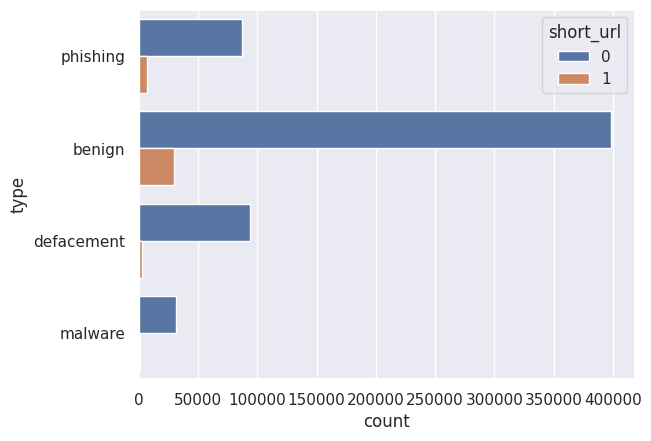

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

In [57]:
df[df['type'] == 'benign']['short_url'].value_counts()

short_url
0    398492
1     29611
Name: count, dtype: int64

In [58]:
df[df['type'] == 'phishing']['short_url'].value_counts()

short_url
0    87275
1     6836
Name: count, dtype: int64

In [59]:
df[df['type'] == 'malware']['short_url'].value_counts()

short_url
0    31813
1      707
Name: count, dtype: int64

In [60]:
df[df['type'] == 'defacement']['short_url'].value_counts()

short_url
0    93856
1     2601
Name: count, dtype: int64

### Count_https: 
Generally malicious URLs do not use HTTPS protocols as it generally requires user credentials and ensures that the website is safe for transactions. So, the presence or absence of HTTPS protocol in the URL is an important feature.

In [61]:
def count_https(url):
    return url.count('https')

df['count_https'] = df['url'].apply(lambda i : count_https(i))


In [62]:
df['count_https'].value_counts()

count_https
0    634768
1     16197
2       183
3        34
5         6
4         3
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Https in URLs')

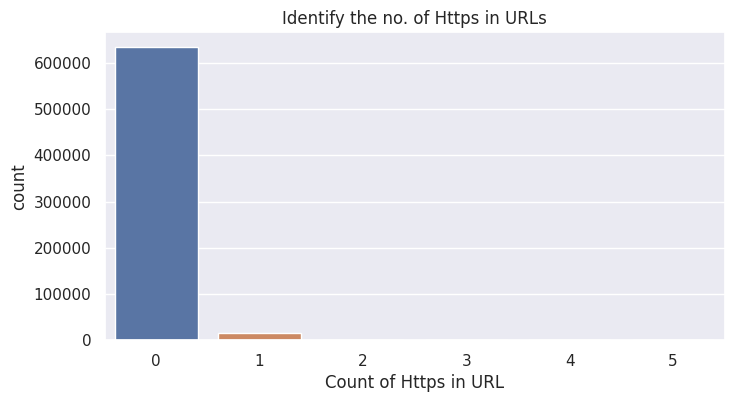

In [63]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_https", data=df)
plt.xlabel('Count of Https in URL')
plt.title("Identify the no. of Https in URLs")

<Axes: xlabel='count', ylabel='type'>

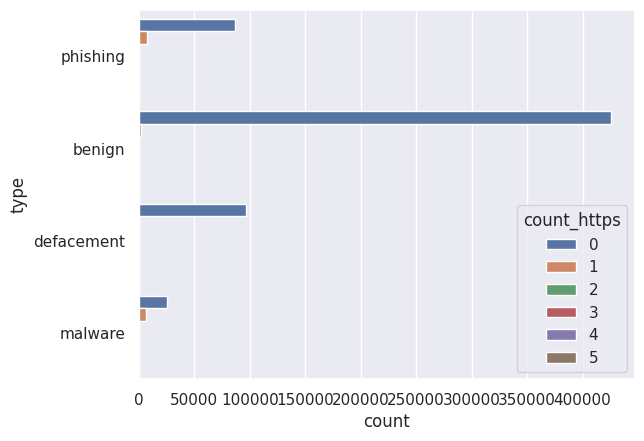

In [64]:
sns.countplot(y = 'type', data = df, hue = 'count_https')

In [65]:
df[df['type'] == 'benign']['count_https'].value_counts()

count_https
0    425707
1      2325
2        47
3        23
4         1
Name: count, dtype: int64

In [66]:
df[df['type'] == 'phishing']['count_https'].value_counts()

count_https
0    86848
1     7108
2      136
3       11
5        6
4        2
Name: count, dtype: int64

In [67]:
df[df['type'] == 'malware']['count_https'].value_counts()

count_https
0    25756
1     6764
Name: count, dtype: int64

In [68]:
df[df['type'] == 'defacement']['count_https'].value_counts()

count_https
0    96457
Name: count, dtype: int64

### Count_http: 
Most of the time, phishing or malicious websites have more than one HTTP in their URL whereas safe sites have only one HTTP.

In [69]:
def count_http(url):
    return url.count('http')

df['count_http'] = df['url'].apply(lambda i : count_http(i))

In [70]:
df['count_http'].value_counts()

count_http
0    461527
1    186625
2      2564
3       455
4        11
9         6
6         2
5         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Http in URLs')

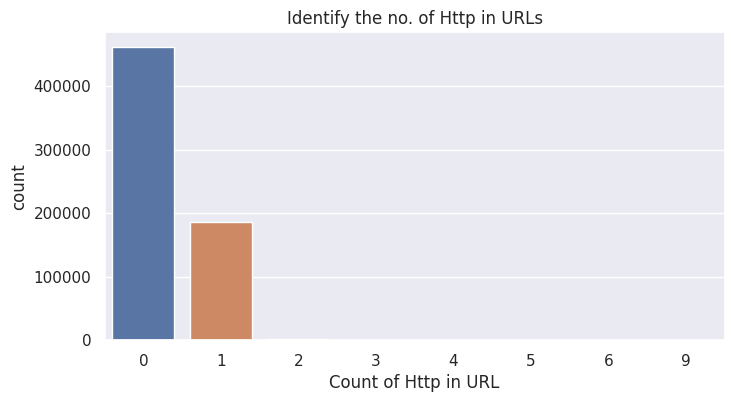

In [71]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_http", data=df)
plt.xlabel('Count of Http in URL')
plt.title("Identify the no. of Http in URLs")

<Axes: xlabel='count', ylabel='type'>

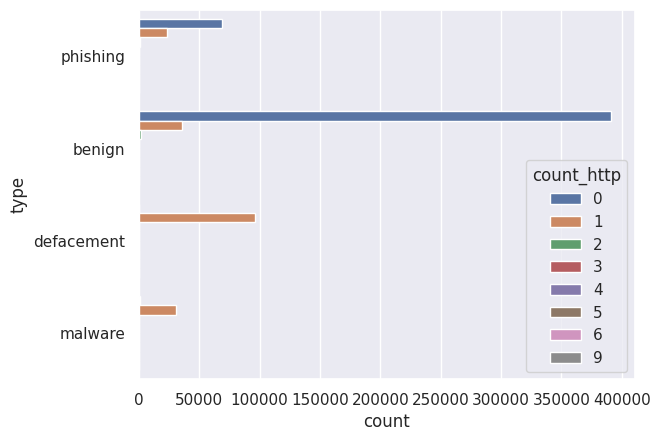

In [72]:
sns.countplot(y = 'type', data = df, hue = 'count_http')

In [73]:
df[df['type'] == 'benign']['count_http'].value_counts()

count_http
0    391104
1     35437
2      1491
3        68
4         3
Name: count, dtype: int64

In [74]:
df[df['type'] == 'phishing']['count_http'].value_counts()

count_http
0    69215
1    23644
2      858
3      377
4        8
9        6
6        2
5        1
Name: count, dtype: int64

In [75]:
df[df['type'] == 'defacement']['count_http'].value_counts()

count_http
1    96382
2       75
Name: count, dtype: int64

In [76]:
df[df['type'] == 'malware']['count_http'].value_counts()

count_http
1    31162
0     1208
2      140
3       10
Name: count, dtype: int64

### Count%: 
As we know URLs cannot contain spaces. URL encoding normally replaces spaces with symbol (%). Safe sites generally contain less number of spaces whereas malicious websites generally contain more spaces in their URL hence more number of %.

In [77]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [78]:
df['count%'].value_counts()

count%
0      623991
1        5824
2        4981
3        2415
6        1710
        ...  
132         1
231         1
198         1
128         1
149         1
Name: count, Length: 124, dtype: int64

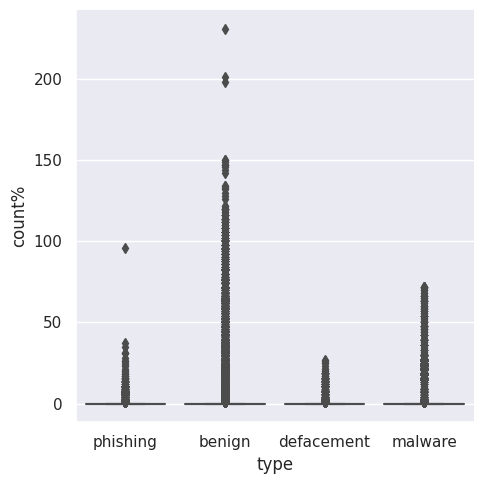

In [79]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count%", kind="box", data=df)

### Count?: 
The presence of symbol (?) in URL denotes a query string that contains the data to be passed to the server. More number of ? in URL definitely indicates suspicious URL.


In [80]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [81]:
df['count?'].value_counts()

count?
0     511013
1     134983
2       5065
3         69
4         25
5         11
7          7
6          3
11         3
8          3
12         2
13         2
14         1
15         1
20         1
10         1
17         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of (?) in URLs')

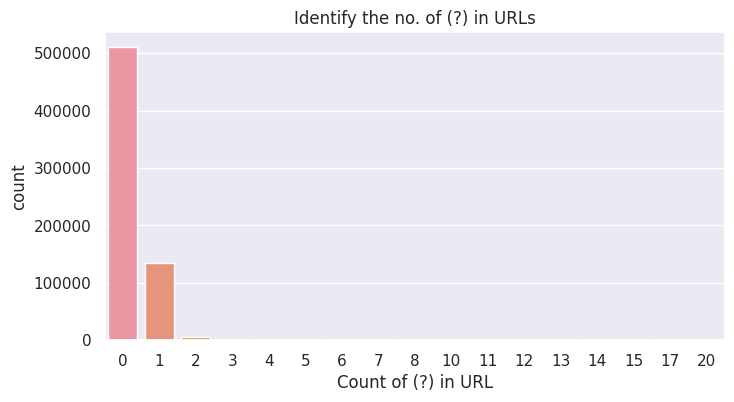

In [82]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count?", data=df)
plt.xlabel('Count of (?) in URL')
plt.title("Identify the no. of (?) in URLs")

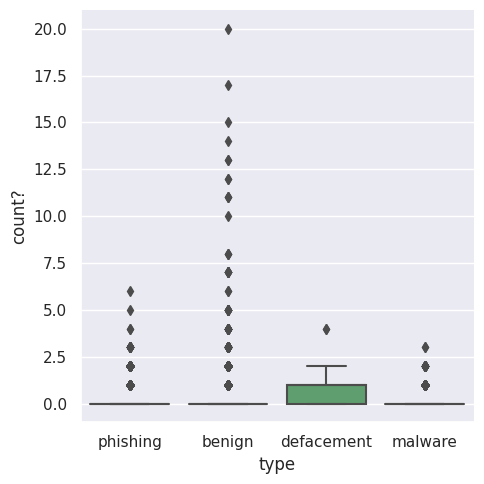

In [83]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count?", kind="box", data=df)

### Count-: 
Phishers or cybercriminals generally add dashes(-) in prefix or suffix of the brand name so that it looks genuine URL. For example. www.flipkart-india.com. 

In [84]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [85]:
df['count-'].value_counts()

count-
0     377210
1     104187
2      44061
3      27016
4      22128
5      16145
6      12277
7       9347
8       8400
9       6775
10      6050
11      4710
12      3567
13      2769
14      1990
15      1414
16       924
17       694
18       411
19       269
20       186
21       151
22       100
23        88
24        61
25        42
26        35
27        34
28        32
29        26
31        16
30        12
34         9
32         9
35         5
38         5
33         5
47         4
36         4
41         4
40         3
37         3
42         3
39         3
64         3
50         1
48         1
87         1
54         1
Name: count, dtype: int64

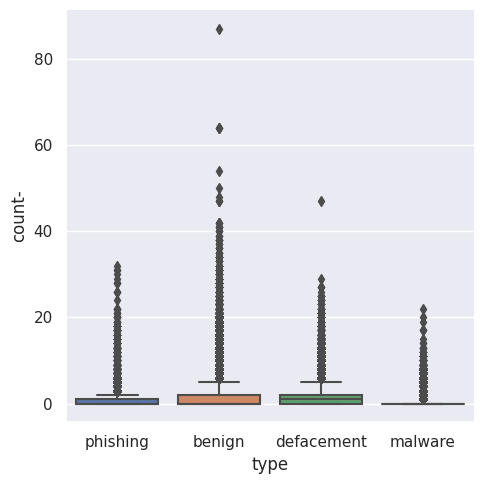

In [86]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-", kind="box", data=df)

### Count=: 
Presence of equal to (=) in URL indicates passing of variable values from one form page to another. It is considered as riskier in URL as anyone can change the values to modify the page.

In [87]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [88]:
df['count='].value_counts()

count=
0     510898
1      54747
2      23212
4      21442
3      14951
5      13443
6       5685
9       2391
7       1981
8       1340
10       344
11       212
12       163
19       127
13       118
14        68
15        19
16        10
17         9
18         7
22         7
34         4
24         4
28         3
20         1
21         1
39         1
29         1
51         1
26         1
Name: count, dtype: int64

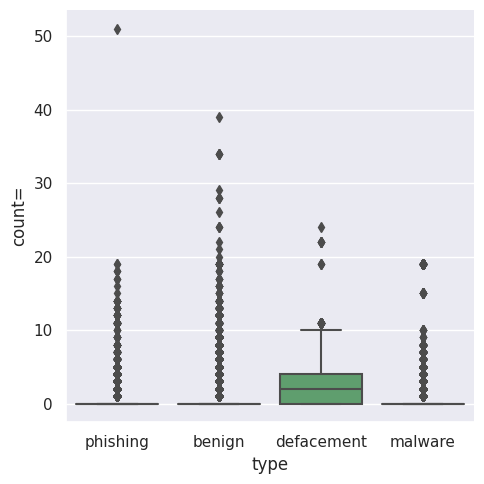

In [89]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count=", kind="box", data=df)

### url_length: 
Attackers generally use long URLs to hide the domain name. We found the average length of a safe URL is 74.

In [90]:
def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [91]:
df['url_length'].value_counts()

url_length
31     19023
33     14209
34     12243
27     11967
35     11700
       ...  
535        1
571        1
636        1
425        1
496        1
Name: count, Length: 549, dtype: int64

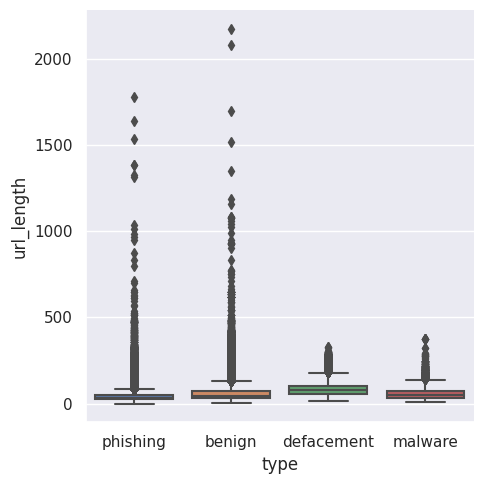

In [92]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="url_length", kind="box", data=df)

### hostname_length:
The length of the hostname is also an important feature for detecting malicious URLs.

In [93]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [94]:
df['hostname_length'].value_counts()

hostname_length
0      463192
15      15950
13      14592
14      14061
20      12039
        ...  
184         1
125         1
100         1
122         1
179         1
Name: count, Length: 134, dtype: int64

### First directory length: 
This feature helps in determining the length of the first directory in the URL. So looking for the first ‘/’ and counting the length of the URL up to this point helps in finding the first directory length of the URL. For accessing directory level information we need to install python library TLD. You can check this link for installing TLD.

In [95]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.5 MB/s eta 0:00:00a 0:00:01


In [96]:
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [97]:
df['fd_length'].value_counts()

fd_length
9      83387
4      80768
0      77782
6      51283
5      50371
       ...  
136        1
237        1
262        1
168        1
230        1
Name: count, Length: 218, dtype: int64

### Length of top-level domains: 
A top-level domain (TLD) is one of the domains at the highest level in the hierarchical Domain Name System of the Internet. For example, in the domain name www.example.com, the top-level domain is com. So, the length of TLD is also important in identifying malicious URLs. As most of the URLs have .com extension. TLDs in the range from 2 to 3 generally indicate safe URLs.

In [98]:
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [99]:
df['tld']

0         None
1         None
2         None
3           be
4          net
          ... 
651186    None
651187    None
651188    None
651189    None
651190    None
Name: tld, Length: 651191, dtype: object

In [100]:
df['tld'].value_counts()

tld
com                            71688
de                             11331
net                             9900
nl                              6157
com.br                          5925
                               ...  
gov.kg                             1
ams3.digitaloceanspaces.com        1
ninja                              1
hopto.org                          1
bf                                 1
Name: count, Length: 548, dtype: int64

In [101]:
df['tld_length'].value_counts()

tld_length
-1     475281
 3      87514
 2      58671
 6      16602
 5       6203
 4       5405
 12       461
 14       307
 7        249
 9        130
 11       124
 16        71
 15        52
 8         50
 10        20
 13        12
 17         9
 26         8
 27         3
 20         3
 30         3
 18         2
 22         2
 25         2
 31         2
 21         2
 39         2
 34         1
Name: count, dtype: int64

In [102]:
df.drop(["tld"], axis = 1, inplace = True)

### Count_digits: 
The presence of digits in URL generally indicate suspicious URLs. Safe URLs generally do not have digits so counting the number of digits in URL is an important feature for detecting malicious URLs.

In [103]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits


df['count_digits']= df['url'].apply(lambda i: digit_count(i))

In [104]:
df['count_digits'].value_counts()

count_digits
0       277500
4        41826
2        36989
1        35880
6        34093
         ...  
322          1
218          1
191          1
1054         1
151          1
Name: count, Length: 222, dtype: int64

In [105]:
df['count_digits'].describe()

count    651191.000000
mean          5.527409
std          11.700814
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max        1204.000000
Name: count_digits, dtype: float64

### Count_letters: 
The number of letters in the URL also plays a significant role in identifying malicious URLs. As attackers try to increase the length of the URL to hide the domain name and this is generally done by increasing the number of letters and digits in the URL. 

In [106]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters


df['count_letters']= df['url'].apply(lambda i: letter_count(i))


In [107]:
df['count_letters'].value_counts()

count_letters
26     16704
25     16617
27     15503
24     15142
28     15054
       ...  
487        1
480        1
485        1
660        1
795        1
Name: count, Length: 425, dtype: int64

In [108]:
df['count_letters'].describe()

count    651191.000000
mean         45.247104
std          31.624502
min           0.000000
25%          25.000000
50%          37.000000
75%          58.000000
max        2141.000000
Name: count_letters, dtype: float64

In [109]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count%,count?,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,1,0,16,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,35,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,31,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,0,1,1,4,88,21,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,0,1,1,3,235,23,9,3,22,199


In [110]:
df.to_csv("preprocessed_data.csv")

In [200]:
df = pd.read_csv("preprocessed_data.csv")

# Label Encoding

In [201]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_code'] = label_encoder.fit_transform(df['type'])
df['type_code'].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [202]:
df.columns

Index(['Unnamed: 0', 'url', 'type', 'use_of_ip', 'abnormal_url',
       'google_index', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domain', 'sus_url', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'fd_length', 'tld_length', 'count_digits',
       'count_letters', 'type_code'],
      dtype='object')

# Creation of Feature & Target

In [203]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count_https',
       'count_http', 'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters']]

In [204]:
Y = df['type_code']

In [205]:
X.shape

(651191, 21)

In [206]:
Y.shape

(651191,)

# Split the Dataset

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , shuffle = True, random_state = 42)

In [209]:
X_train.shape , Y_train.shape

((520952, 21), (520952,))

In [210]:
X_test.shape , Y_test.shape

((130239, 21), (130239,))

In [211]:
X_train

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count%,count?,...,count=,url_length,count_https,count_http,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters
461072,0,0,2,0,0,2,0,0,0,0,...,0,40,0,0,0,0,4,-1,0,34
621879,0,0,2,0,0,2,0,0,0,0,...,0,26,0,0,0,0,4,-1,3,19
376801,0,0,2,0,0,2,0,0,0,0,...,0,30,0,0,0,0,4,-1,0,26
560108,0,0,1,0,0,4,0,0,0,0,...,0,42,0,0,0,0,11,-1,0,36
454327,0,0,2,0,0,1,0,0,0,0,...,0,25,0,0,0,0,7,-1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644167,0,0,3,1,0,1,0,1,0,0,...,0,32,0,0,0,0,16,-1,0,27
259178,0,0,1,0,0,0,0,0,0,0,...,0,15,0,0,0,0,0,-1,3,11
365838,0,1,3,1,0,1,0,0,0,1,...,5,98,0,1,17,0,9,2,11,67
131932,0,0,2,0,0,3,0,0,0,0,...,0,53,0,0,0,0,11,-1,7,39


In [212]:
X_train.values

array([[ 0,  0,  2, ..., -1,  0, 34],
       [ 0,  0,  2, ..., -1,  3, 19],
       [ 0,  0,  2, ..., -1,  0, 26],
       ...,
       [ 0,  1,  3, ...,  2, 11, 67],
       [ 0,  0,  2, ..., -1,  7, 39],
       [ 0,  0,  2, ..., -1,  0, 35]])

In [213]:
X.shape

(651191, 21)

In [214]:
Y.shape

(651191,)

In [215]:
X_train.shape

(520952, 21)

# Model Building

## Classification report Fuction

In [127]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support, classification_report

def result(y_pred , y_test):
    accuracy = accuracy_score(y_test, y_pred) * 100
#     print(accuracy)
    
    precision , recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    
    res = {
        "Accuracy": accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }
    
    print(classification_report(y_test, y_pred ,target_names=['benign', 'defacement','phishing','malware']))
    
    
    
    return res
    

In [128]:
from sklearn.metrics import confusion_matrix

def create_confusion_metric(y_pred , y_test):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,fmt=".1f")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    
    plt.show()
    

In [129]:
!pip install termcolor

# Model Pipeline

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored


# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),    
}


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


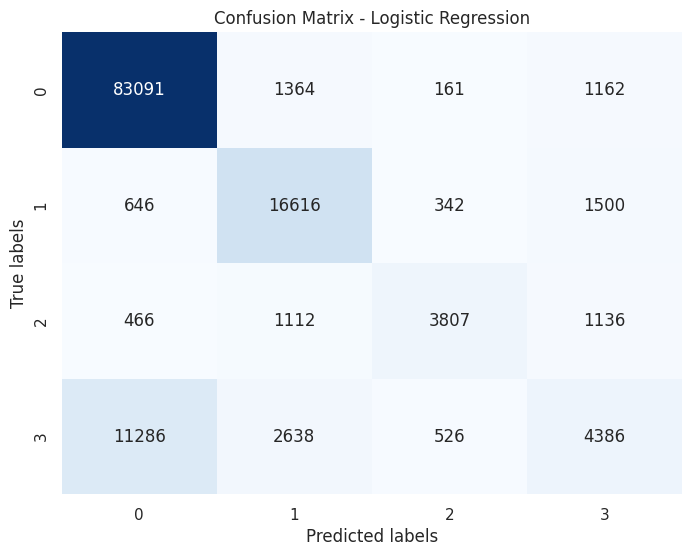

Logistic Regression classifier: Training Results
Training accuracy: 0.8292337873738848
Training precision: 0.803376918005294
Training recall: 0.8292337873738848
Training F1 score: 0.80468018396153

Logistic Regression classifier: Testing Results
Testing accuracy: 0.8284768771
Testing Precision: 0.8021943030
Testing Recall: 0.8284768771
Testing F1 score: 0.8037064319

Training Decision Tree...


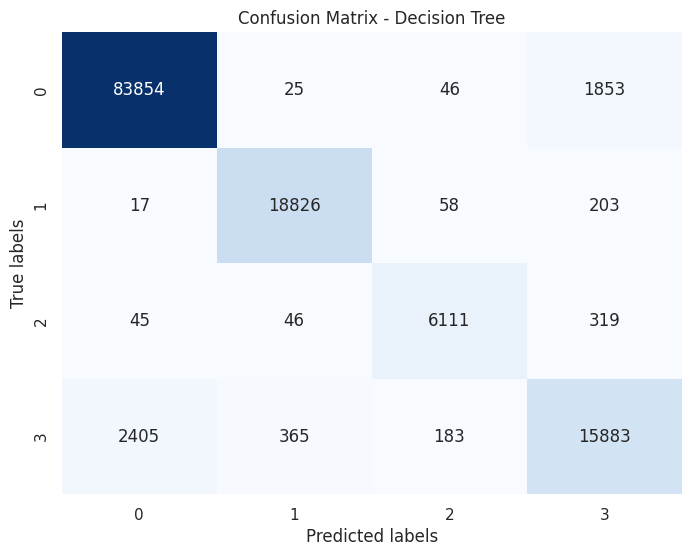

Decision Tree classifier: Training Results
Training accuracy: 0.9861561141909427
Training precision: 0.9860806372874145
Training recall: 0.9861561141909427
Training F1 score: 0.9860523050155543

Decision Tree classifier: Testing Results
Testing accuracy: 0.9572708636
Testing Precision: 0.9567978197
Testing Recall: 0.9572708636
Testing F1 score: 0.9569911379

Training Random Forest...


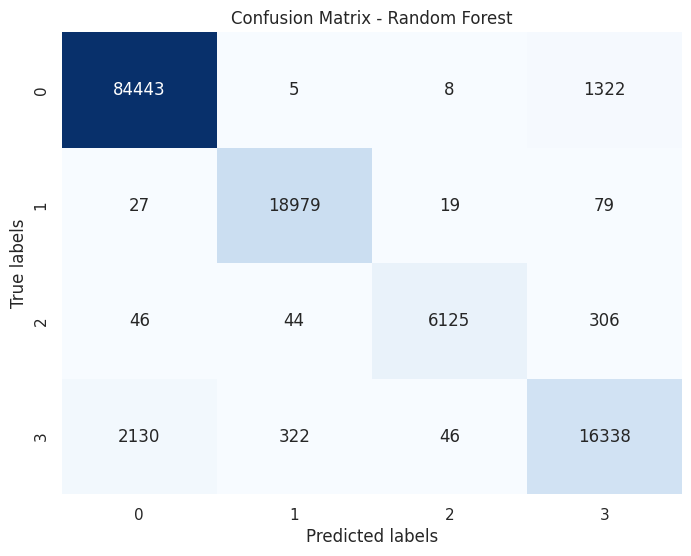

Random Forest classifier: Training Results
Training accuracy: 0.9861503555030022
Training precision: 0.9860831772010737
Training recall: 0.9861503555030022
Training F1 score: 0.9860854778826188

Random Forest classifier: Testing Results
Testing accuracy: 0.9665691536
Testing Precision: 0.9661710805
Testing Recall: 0.9665691536
Testing F1 score: 0.9662577541

Training XGBoost...


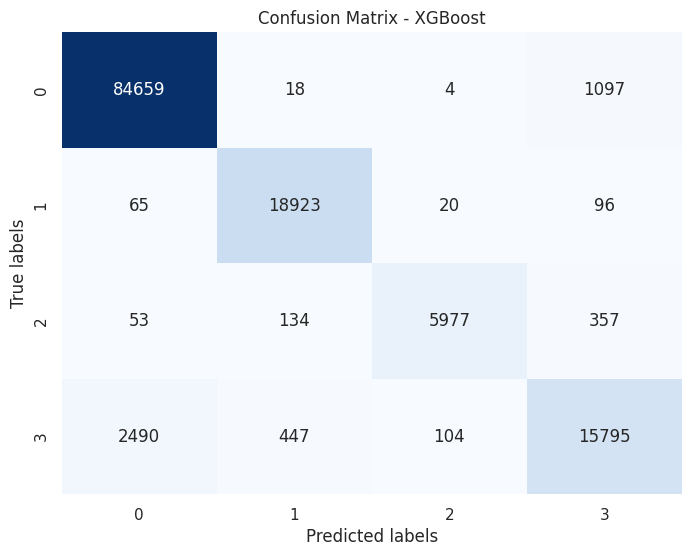

XGBoost classifier: Training Results
Training accuracy: 0.964261582641011
Training precision: 0.9636592734017958
Training recall: 0.964261582641011
Training F1 score: 0.9636137241717645

XGBoost classifier: Testing Results
Testing accuracy: 0.9624920339
Testing Precision: 0.9618421723
Testing Recall: 0.9624920339
Testing F1 score: 0.9618362279



In [133]:

# Train and evaluate each model
for model_name, model in models.items():
    print(colored(f"Training {model_name}...", 'red', attrs=['bold']))
#     print(f"Training {model_name}...")
    
    # Fit model to training data
    model.fit(X_train, Y_train)
    
    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics for Train Data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
     #train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train), multi_class='ovr')
    
    
    # Calculate performance metrics for Test Data
    accuracy = accuracy_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred, average='weighted')
    recall = recall_score(Y_test, y_test_pred, average='weighted')
    f1 = f1_score(Y_test, y_test_pred, average='weighted')
     #test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred)
    plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Generate ROC-AUC curve
     #fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test), multi_class='ovr')
     #plt.figure(figsize=(8,6))
     #plt.plot(fpr, tpr, label=f'ROC-AUC Curve (Area = {roc_auc:.2f})')
     #plt.plot([0, 1], [0, 1], linestyle='--')
     #plt.xlabel('False Positive Rate')
     #plt.ylabel('True Positive Rate')
     #plt.title(f'ROC-AUC Curve - {model_name}')
     #plt.legend()
     #plt.show()
     #print(""*5)
    # Print results Train Data
#     print(f"{model_name} classifier: Training Results")
    print(colored(f"{model_name} classifier: Training Results", 'green', attrs=['bold']))
    print("Training accuracy:", train_accuracy)
    print("Training precision:", train_precision)
    print("Training recall:", train_recall)
    print("Training F1 score:", train_f1)
    print("="*50)
    print(""*5)
    
    # Print results Test Data
#     print(f"{model_name} classifier: Testing Results")
    print(colored(f"{model_name} classifier: Testing Results", 'green', attrs=['bold']))
    print(f"Testing accuracy: {accuracy:.10f}")
    print(f"Testing Precision: {precision:.10f}")
    print(f"Testing Recall: {recall:.10f}")
    print(f"Testing F1 score: {f1:.10f}")
    print("="*50)
    print(""*5)

# Model Pipeline with Hyperparameter Tuning


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Best parameters for Logistic Regression:
{'C': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.60      0.48      0.53        67
           1       0.72      0.79      0.75        67
           2       0.63      0.70      0.66        66

    accuracy                           0.66       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.65      0.66      0.65       200



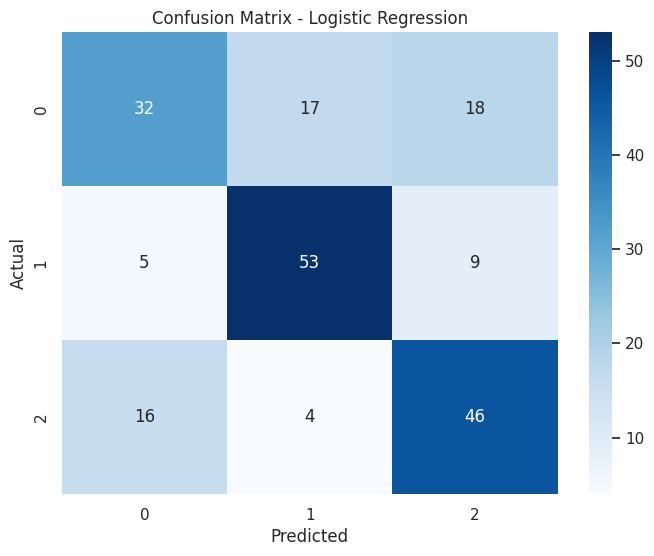


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        67
           1       0.72      0.78      0.75        67
           2       0.70      0.71      0.71        66

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.69      0.69      0.69       200



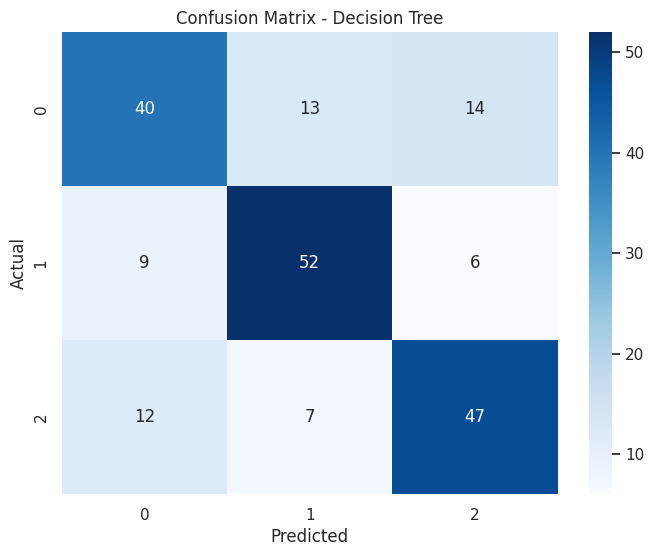


Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        67
           1       0.87      0.87      0.87        67
           2       0.85      0.80      0.83        66

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.83      0.84       200



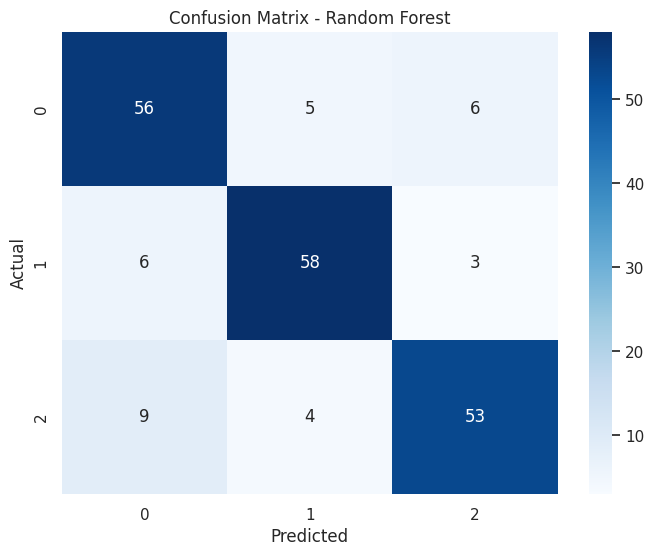


Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits

Best parameters for XGBoost:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        67
           1       0.88      0.88      0.88        67
           2       0.82      0.83      0.83        66

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



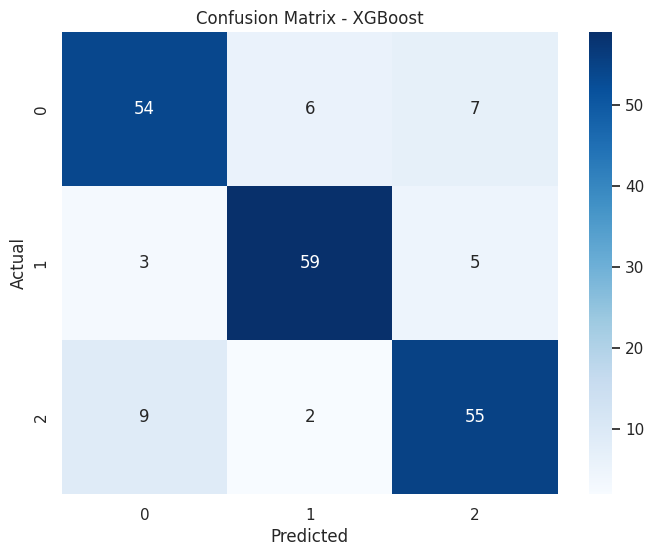



=== FINAL MODEL COMPARISON ===
                     train_accuracy  test_accuracy  precision  recall  \
XGBoost                     1.00000          0.840   0.839986   0.840   
Random Forest               1.00000          0.835   0.836322   0.835   
Decision Tree               0.92000          0.695   0.693109   0.695   
Logistic Regression         0.69375          0.655   0.650142   0.655   

                           f1   roc_auc  
XGBoost              0.839962  0.953938  
Random Forest        0.835165  0.953732  
Decision Tree        0.693256  0.799850  
Logistic Regression  0.648928  0.856824  

Best performing model: XGBoost
Test Accuracy: 0.8400

Saved best model to 'best_model.pkl' and scaler to 'scaler.pkl'


In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             make_scorer, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
import joblib

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Load your data (replace this with your actual data loading)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']


# 2. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Initialize models with basic parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False)
}

# 4. Define parameter grids for each model (optimized to avoid warnings)
param_grids = {
    "Logistic Regression": [
        {
            'penalty': ['l1'],
            'solver': ['saga'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'multi_class': ['auto', 'ovr']
        },
        {
            'penalty': ['l2'],
            'solver': ['saga', 'lbfgs'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'multi_class': ['auto', 'ovr', 'multinomial']
        },
        {
            'penalty': ['elasticnet'],
            'solver': ['saga'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'l1_ratio': [0.1, 0.5, 0.9],
            'multi_class': ['auto', 'ovr']
        }
    ],
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
}

# 5. Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# 6. Dictionary to store results
results = {}

# 7. Perform grid search for each model
for model_name, model in models.items():
    print(colored(f"\n{'='*50}\nTuning hyperparameters for {model_name}...\n{'='*50}", 
                  'red', attrs=['bold']))
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=cv,
        scoring=scoring,
        refit='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test) if hasattr(best_model, 'predict_proba') else None
    
    # Calculate metrics
    metrics = {
        'best_params': grid_search.best_params_,
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred, average='weighted'),
        'recall': recall_score(y_test, y_test_pred, average='weighted'),
        'f1': f1_score(y_test, y_test_pred, average='weighted'),
        'model': best_model
    }
    
    # Add ROC AUC if available
    if y_test_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    
    # Store results
    results[model_name] = metrics
    
    # Print results
    print(colored(f"\nBest parameters for {model_name}:", 'green'))
    print(grid_search.best_params_)
    
    print(colored("\nClassification Report (Test Set):", 'blue'))
    print(classification_report(y_test, y_test_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 8. Compare all models
print(colored("\n\n=== FINAL MODEL COMPARISON ===", 'magenta', attrs=['bold']))
comparison_df = pd.DataFrame.from_dict(results, orient='index')
metrics_to_show = ['train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1']
if 'roc_auc' in comparison_df.columns:
    metrics_to_show.append('roc_auc')
comparison_df = comparison_df[metrics_to_show]
print(comparison_df.sort_values(by='test_accuracy', ascending=False))

# 9. Save the best model
best_model_name = comparison_df['test_accuracy'].idxmax()
best_model = results[best_model_name]['model']
print(colored(f"\nBest performing model: {best_model_name}", 'green', attrs=['bold']))
print(colored(f"Test Accuracy: {comparison_df.loc[best_model_name, 'test_accuracy']:.4f}", 'green'))

# Save the model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(colored("\nSaved best model to 'best_model.pkl' and scaler to 'scaler.pkl'", 'blue'))

# Deep Learning Models

## 1. Simple RNN

In [216]:
X_train.shape


(520952, 21)

Num GPUs Available:  2
/device:GPU:0
GPU will be used
Training data shape: (520952, 21)
Testing data shape: (130239, 21)


I0000 00:00:1745428486.638302      31 gpu_device.cc:2022] Created device /device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745428486.638552      31 gpu_device.cc:2022] Created device /device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 19, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,956 (179.52 KB)

 Trainable params: 45,956 (179.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


I0000 00:00:1745428490.542605     214 service.cc:148] XLA service 0x79f5b80049d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745428490.544508     214 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745428490.544531     214 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745428490.994969     214 cuda_dnn.cc:529] Loaded cuDNN version 90300


  39/4070 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6858 - loss: 0.7988 

I0000 00:00:1745428493.003328     214 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4070/4070 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9095 - loss: 0.2617 - val_accuracy: 0.9458 - val_loss: 0.1655
Epoch 2/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9428 - loss: 0.1746 - val_accuracy: 0.9470 - val_loss: 0.1623
Epoch 3/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9469 - loss: 0.1617 - val_accuracy: 0.9499 - val_loss: 0.1516
Epoch 4/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9489 - loss: 0.1539 - val_accuracy: 0.9506 - val_loss: 0.1500
Epoch 5/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9503 - loss: 0.1497 - val_accuracy: 0.9482 - val_loss: 0.1509
Epoch 6/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9510 - loss: 0.1484 - val_accuracy: 0.9527 - val_loss: 0.1419
Epoch 7/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9517 - loss: 0.1449 - val_accuracy: 0.9528 - val_loss: 0.1433
Epoch 8/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9524 - loss: 0.1437 - val

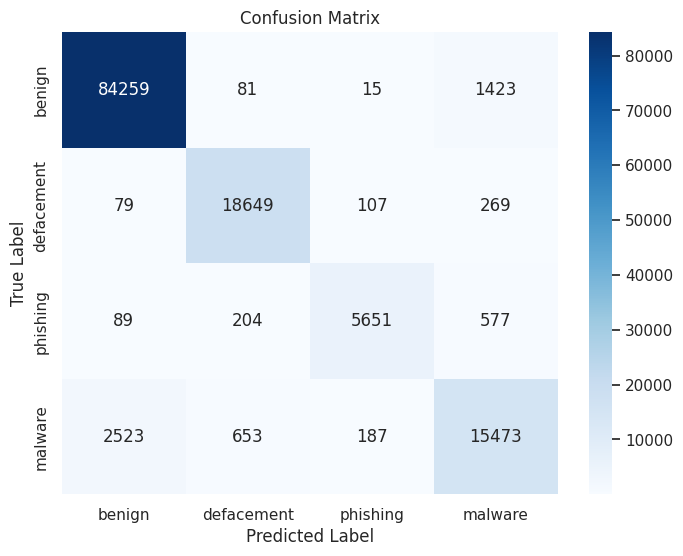

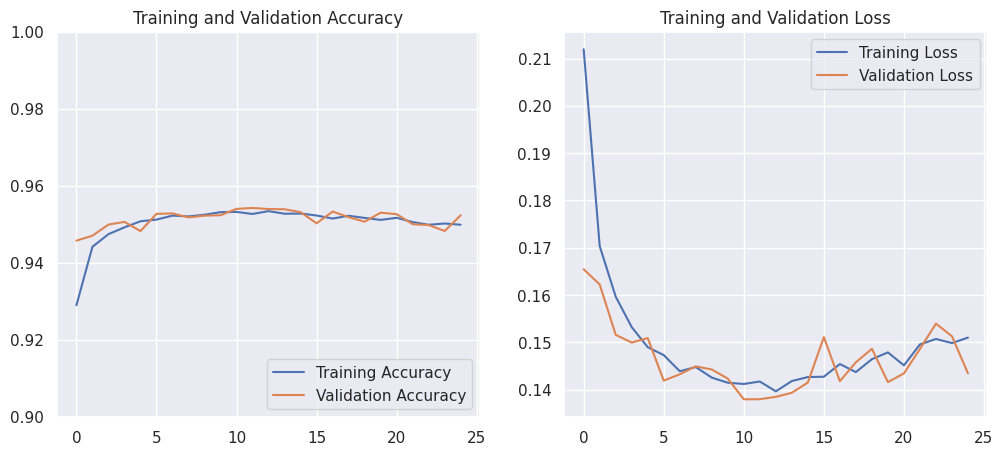

Model saved to Models/SimpleRNN.h5

Loading saved model for verification...
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9528 - loss: 0.1417


[0.14346270263195038, 0.9523414373397827]

In [217]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Check GPU availability and configure
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())
if tf.config.list_physical_devices('GPU'):
    print("GPU will be used")
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
else:
    print("CPU will be used")

# Load and prepare your data (replace with your actual data loading code)
# X_train, X_test, Y_train, Y_test = load_your_data()

# Convert to numpy arrays
X_train_df = X_train
X_test_df = X_test
Y_train_df = Y_train
Y_test_df = Y_test

# Reshape data if needed (assuming shape is already (samples, timesteps, features))
print(f"Training data shape: {X_train_df.shape}")
print(f"Testing data shape: {X_test_df.shape}")

# Define the SimpleRNN model
model_simpleRNN = Sequential([
    layers.InputLayer(input_shape=(19, 1)),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(128),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(4, activation="softmax"),
])

model_simpleRNN.summary()

# Compile the model
model_simpleRNN.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model with GPU acceleration
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    history_simpleRNN = model_simpleRNN.fit(
        x=X_train_df,
        y=Y_train_df,
        batch_size=128,
        validation_data=(X_test_df, Y_test_df),
        verbose=1,
        epochs=25,
        shuffle=True
    )

# Make predictions
y_pred_simpleRNN = model_simpleRNN.predict(X_test_df)
Y_pred_simpleRNN = np.argmax(y_pred_simpleRNN, axis=1)

# Evaluation functions
def result(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    return cm

def create_confusion_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Class names
class_names = ['benign', 'defacement', 'phishing', 'malware']

# Evaluate model
test_loss, test_acc = model_simpleRNN.evaluate(X_test_df, Y_test_df)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate and show results
cm = result(Y_test_df, Y_pred_simpleRNN)
create_confusion_metric(Y_test_df, Y_pred_simpleRNN)

# Plot training history
EPOCHS = 25
acc_simpleRNN = history_simpleRNN.history['accuracy']
val_acc_simpleRNN = history_simpleRNN.history['val_accuracy']
loss_simpleRNN = history_simpleRNN.history['loss']
val_loss_simpleRNN = history_simpleRNN.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_simpleRNN, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc_simpleRNN, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.axis(ymin=0.9, ymax=1)

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_simpleRNN, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_simpleRNN, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model_simpleRNN.save('Models/SimpleRNN.h5')
print("Model saved to Models/SimpleRNN.h5")

# Optional: Load and verify the saved model
print("\nLoading saved model for verification...")
reconstructed_model = tf.keras.models.load_model("Models/SimpleRNN.h5")
reconstructed_model.evaluate(X_test_df, Y_test_df)

## 2. LSTM RNN

Num GPUs Available:  2
GPU will be used
Training data shape: (520952, 21)
Testing data shape: (130239, 21)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 19, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 19, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625,796 (2.39 MB)

 Trainable params: 625,796 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.8694 - loss: 0.3576 - val_accuracy: 0.9386 - val_loss: 0.1823
Epoch 2/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9394 - loss: 0.1838 - val_accuracy: 0.9466 - val_loss: 0.1589
Epoch 3/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9485 - loss: 0.1557 - val_accuracy: 0.9529 - val_loss: 0.1412
Epoch 4/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9529 - loss: 0.1427 - val_accuracy: 0.9556 - val_loss: 0.1326
Epoch 5/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9558 - loss: 0.1333 - val_accuracy: 0.9567 - val_loss: 0.1334
Epoch 6/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9582 - loss: 0.1256 - val_accuracy: 0.9579 - val_loss: 0.1270
Epoch 7/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9597 - loss: 0.1200 - val_accuracy: 0.9601 - val_loss: 0.1229
Epoch 8/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9615 -

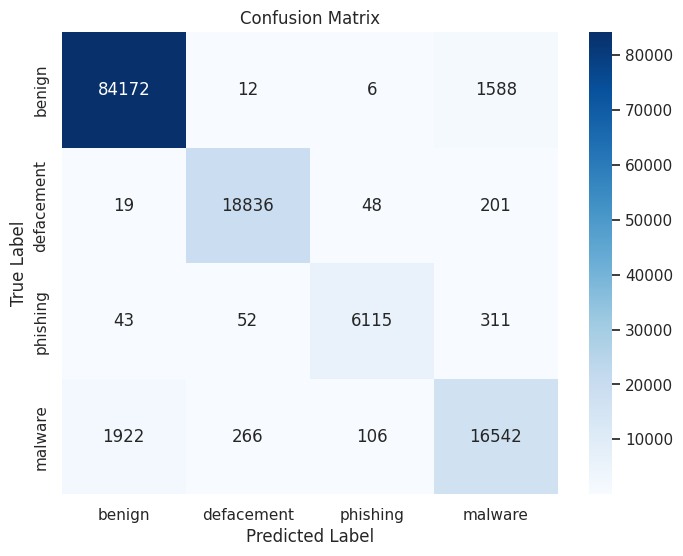

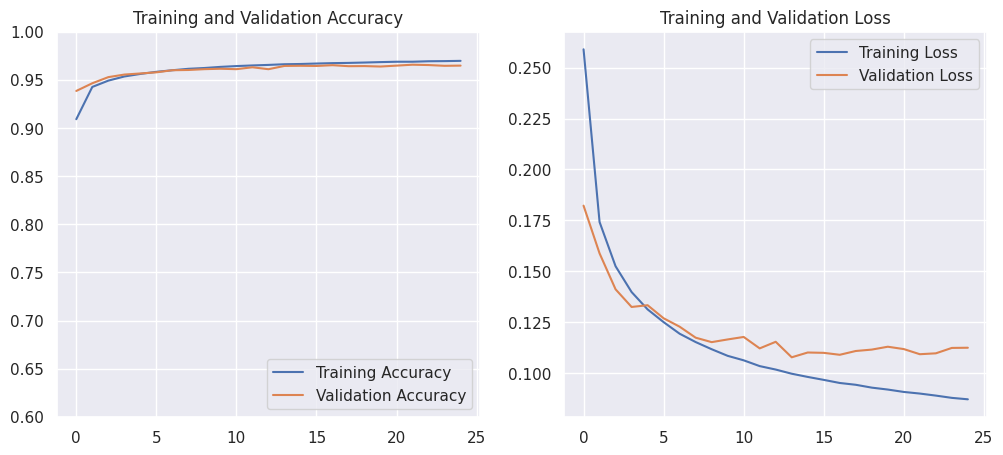


Model saved to Models/LSTM.h5

Loading saved model for verification...
Saved model evaluation:
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9657 - loss: 0.1105


[0.11258797347545624, 0.9648799300193787]

In [218]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configure GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("GPU will be used")
    # Configure GPU memory growth to avoid allocating all memory at once
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("CPU will be used")

# Assuming your data is already loaded as:
# X_train_df, X_test_df, Y_train_df, Y_test_df

# Verify shapes
print(f"Training data shape: {X_train_df.shape}")  # Should be (samples, 19, 1)
print(f"Testing data shape: {X_test_df.shape}")    # Should be (samples, 19, 1)

# Define the LSTM model
model_LSTM = Sequential([
    layers.InputLayer(input_shape=(19, 1)),
    layers.LSTM(128, activation='tanh', return_sequences=True),
    layers.LSTM(128, activation='tanh', return_sequences=True),
    layers.LSTM(256, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax'),
])

model_LSTM.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

model_LSTM.summary()

# Train the model with GPU acceleration
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    History_LSTM = model_LSTM.fit(
        x=X_train_df,
        y=Y_train_df,
        batch_size=128,
        epochs=25,
        shuffle=True,
        validation_data=(X_test_df, Y_test_df),
        verbose=1
    )

# Evaluation functions
def result(y_true, y_pred):
    class_names = ['benign', 'defacement', 'phishing', 'malware']
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return cm

def create_confusion_metric(y_true, y_pred):
    class_names = ['benign', 'defacement', 'phishing', 'malware']
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Make predictions
y_pred_LSTM = model_LSTM.predict(X_test_df)
Y_pred_LSTM = np.argmax(y_pred_LSTM, axis=1)

# Evaluate model
print("\nTest Set Evaluation:")
test_loss, test_acc = model_LSTM.evaluate(X_test_df, Y_test_df)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nTraining Set Evaluation:")
train_loss, train_acc = model_LSTM.evaluate(X_train_df, Y_train_df)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")

# Generate reports
print("\nClassification Results:")
result(Y_test_df, Y_pred_LSTM)
create_confusion_metric(Y_test_df, Y_pred_LSTM)

# Plot training history
EPOCHS = 25
acc_LSTM = History_LSTM.history['accuracy']
val_acc_LSTM = History_LSTM.history['val_accuracy']
loss_LSTM = History_LSTM.history['loss']
val_loss_LSTM = History_LSTM.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_LSTM, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc_LSTM, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.axis(ymin=0.6, ymax=1)

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_LSTM, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_LSTM, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save and verify model
model_LSTM.save('Models/LSTM.h5')
print("\nModel saved to Models/LSTM.h5")

print("\nLoading saved model for verification...")
LSTM_Load = tf.keras.models.load_model('Models/LSTM.h5')
print("Saved model evaluation:")
LSTM_Load.evaluate(X_test_df, Y_test_df)

## 3. GRU RNN

Num GPUs Available:  2
Using GPU acceleration
Training data shape: (520952, 21)
Testing data shape: (130239, 21)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 19, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 19, 256)             │         296,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 128)                 │         148,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,004 (1.95 MB)

 Trainable params: 512,004 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - accuracy: 0.8864 - loss: 0.3226 - val_accuracy: 0.9424 - val_loss: 0.1767
Epoch 2/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.9442 - loss: 0.1730 - val_accuracy: 0.9501 - val_loss: 0.1474
Epoch 3/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.9515 - loss: 0.1491 - val_accuracy: 0.9550 - val_loss: 0.1340
Epoch 4/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9541 - loss: 0.1389 - val_accuracy: 0.9573 - val_loss: 0.1300
Epoch 5/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.9565 - loss: 0.1318 - val_accuracy: 0.9576 - val_loss: 0.1269
Epoch 6/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9585 - loss: 0.1263 - val_accuracy: 0.9590 - val_loss: 0.1234
Epoch 7/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9602 - loss: 0.1230 - val_accuracy: 0.9604 - val_loss: 0.1237
Epoch 8/25
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9596 - lo

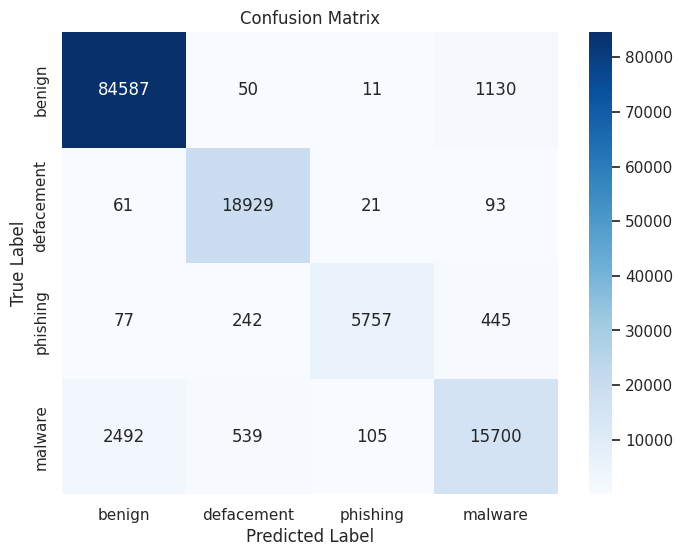

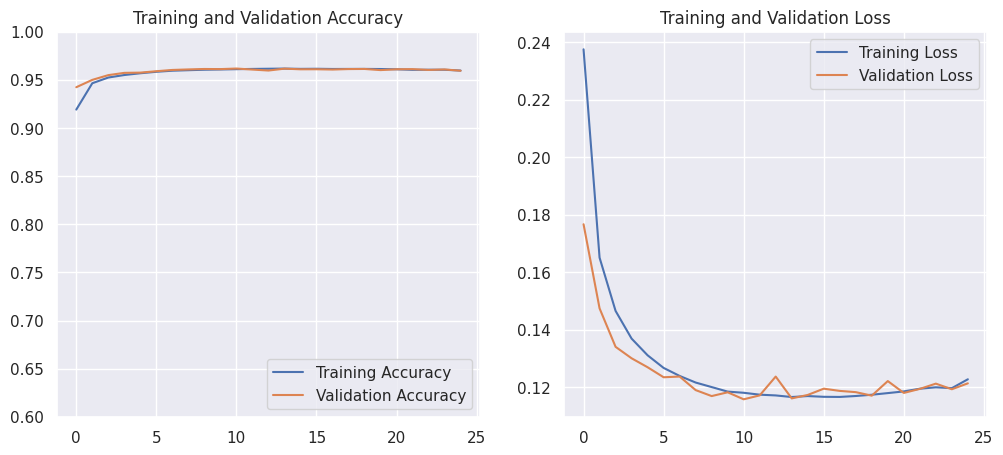


Model saved to Models/GRU.h5

Loading and verifying saved model...
Saved model evaluation results:
4070/4070 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9599 - loss: 0.1195


[0.12130934000015259, 0.9595666527748108]

In [219]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configure GPU settings
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU acceleration")
    # Enable memory growth to prevent allocating all GPU memory at once
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU available, using CPU")

# Verify data shapes
print(f"Training data shape: {X_train_df.shape}")  # Should be (samples, 19, 1)
print(f"Testing data shape: {X_test_df.shape}")    # Should be (samples, 19, 1)

# Define the GRU model
model_GRU = Sequential([
    layers.InputLayer(input_shape=(19, 1)),
    layers.GRU(128, activation='tanh', return_sequences=True),
    layers.GRU(256, activation='tanh', return_sequences=True),
    layers.GRU(128, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model_GRU.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

model_GRU.summary()

# Train the model with GPU acceleration
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    History_GRU = model_GRU.fit(
        x=X_train_df,
        y=Y_train_df,
        batch_size=128,
        epochs=25,
        shuffle=True,
        validation_data=(X_test_df, Y_test_df),
        verbose=1
    )

# Evaluation functions
def result(y_true, y_pred):
    class_names = ['benign', 'defacement', 'phishing', 'malware']
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return cm

def create_confusion_metric(y_true, y_pred):
    class_names = ['benign', 'defacement', 'phishing', 'malware']
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Make predictions
y_pred_GRU = model_GRU.predict(X_test_df)
Y_pred_GRU = np.argmax(y_pred_GRU, axis=1)  # Vectorized version of your loop

# Evaluate model performance
print("\nTest Set Evaluation:")
test_loss, test_acc = model_GRU.evaluate(X_test_df, Y_test_df)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nTraining Set Evaluation:")
train_loss, train_acc = model_GRU.evaluate(X_train_df, Y_train_df)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")

# Generate classification reports
result(Y_test_df, Y_pred_GRU)
create_confusion_metric(Y_test_df, Y_pred_GRU)

# Plot training history
EPOCHS = 25
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), History_GRU.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), History_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim(0.6, 1)

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), History_GRU.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), History_GRU.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save and verify model
model_GRU.save('Models/GRU.h5')
print("\nModel saved to Models/GRU.h5")

# Load and verify saved model
print("\nLoading and verifying saved model...")
load_GRU = keras.models.load_model('Models/GRU.h5')
print("Saved model evaluation results:")
load_GRU.evaluate(X_test_df, Y_test_df)

In [220]:
import shutil

# Zip the model file
shutil.make_archive('Models', 'zip', '/kaggle/working/Models')

print("Model zipped and ready for download from the Output tab")

Model zipped and ready for download from the Output tab


In [223]:
from IPython.display import HTML

HTML('<a href="/kaggle/working/Models.zip" download>📥 Click here to download Models.zip</a>')
